# Install the necessary python libraries

In [7]:
# !pip install networkx pandas numpy matplotlib grakel
# Note:
# python = 3.10.0
# numpy = 1.23.5
# scipy = 1.9.3

In [8]:
import networkx as nx
import numpy as np
from networkx.algorithms import isomorphism

# 1. VF2 
## 1.1. Undirected graph

In [9]:
# Generate 2 graphs
G1 = nx.Graph()
G2 = nx.Graph()

G1.add_nodes_from(range(0,7))
G2.add_nodes_from(range(0,7))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: True


{0: 0, 1: 1, 4: 2, 2: 3, 6: 4, 3: 5, 5: 6}

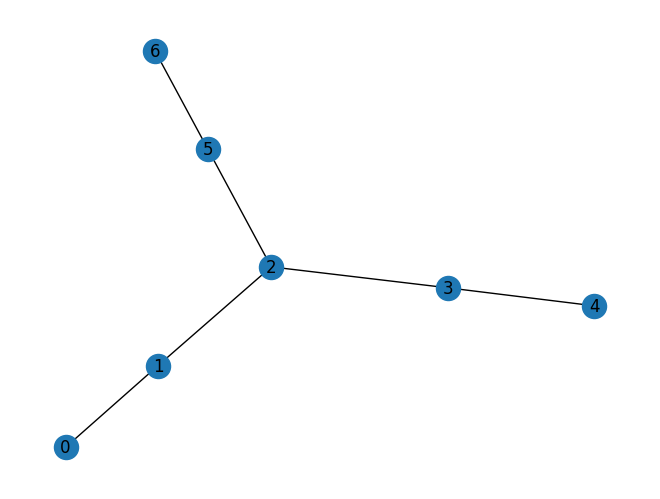

In [10]:
nx.draw(G1, with_labels = True)

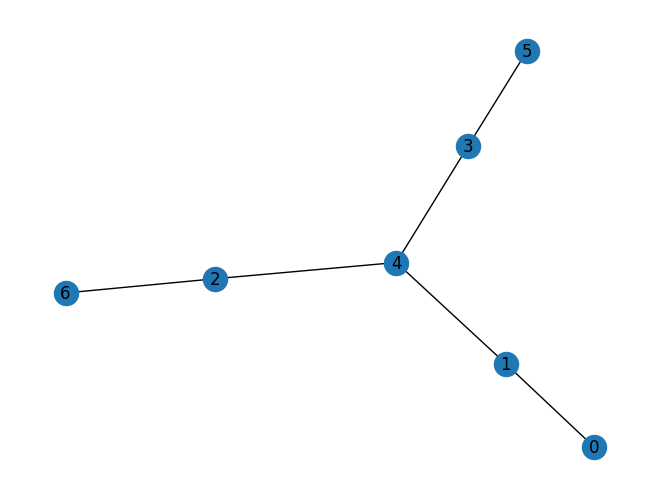

In [11]:
nx.draw(G2, with_labels = True)

## 1.2. Directed graph

In [12]:
# Generate 2 graphs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_nodes_from(range(0,7))
G2.add_nodes_from(range(0,7))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: False


{}

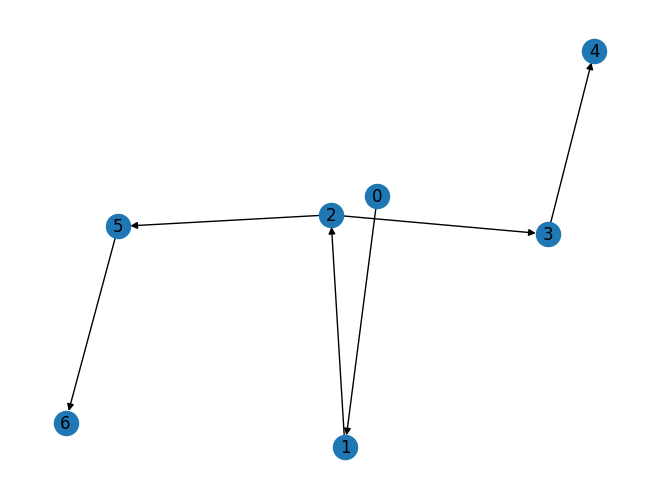

In [13]:
nx.draw(G1, with_labels = True)

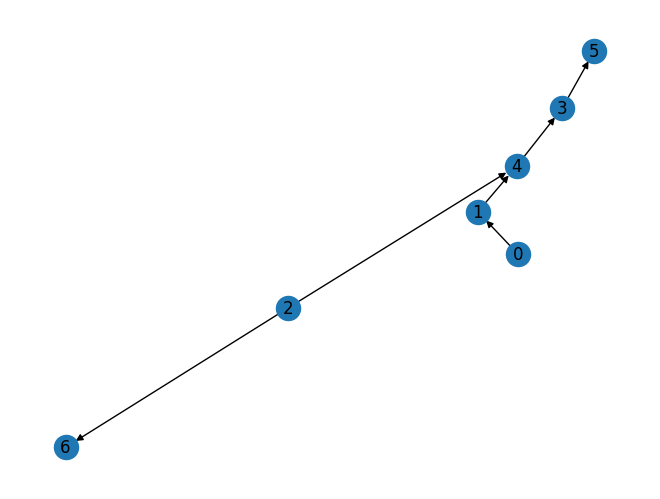

In [14]:
nx.draw(G2, with_labels = True)

In [15]:
# Generate 2 directed graphs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_nodes_from(range(0,7))
G2.add_nodes_from(range(0,7))
# Change graph edges
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6)])
G2.add_edges_from([(0,1), (1,4), (4,2), (2,6), (4,3), (3,5)])

# Mapping 2 graph G1 and G2
GM = isomorphism.GraphMatcher(G2,G1)
print(f" Checking graph isomorphic: {GM.is_isomorphic()}")
GM.mapping

 Checking graph isomorphic: True


{0: 0, 1: 1, 4: 2, 2: 3, 6: 4, 3: 5, 5: 6}

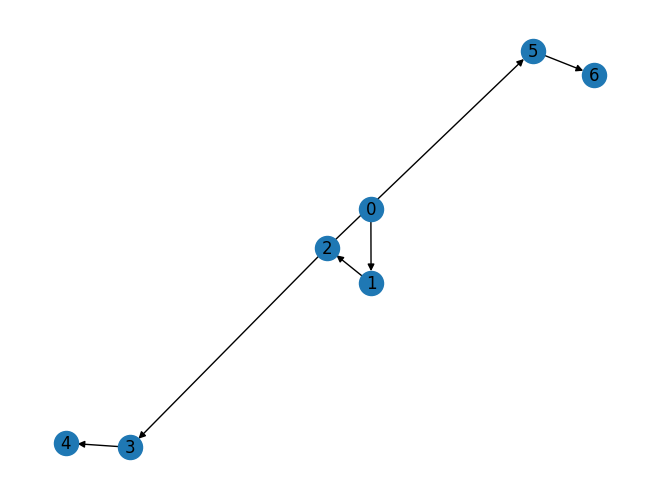

In [16]:
nx.draw(G1, with_labels = True)

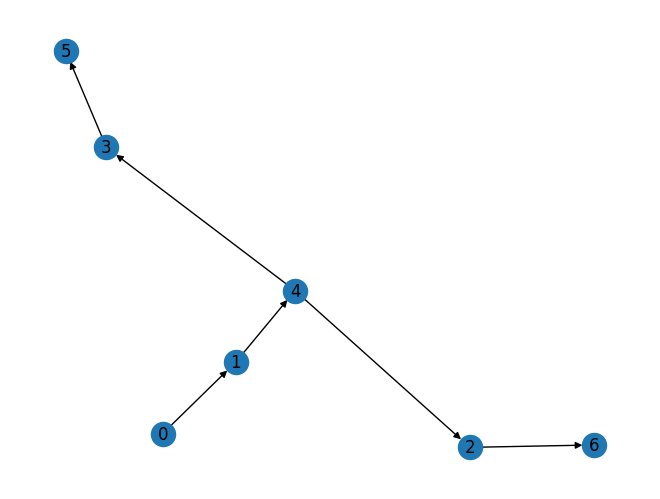

In [17]:
nx.draw(G2, with_labels = True)

# 2. Weisfeiler Lehman (WL) graph hash
The function iteratively aggregates and hashes neighbourhoods of each node. 

After each node’s neighbors are hashed to obtain updated node labels, a hashed histogram of resulting labels is returned as the final hash.

Hashes are identical for isomorphic graphs and strong guarantees that non-isomorphic graphs will get different hashes.

## 2.1. Undirected graph

In [18]:
import networkx as nx

G1 = nx.Graph()
G2 = nx.Graph()

G1.add_nodes_from(range(0,7))
G2.add_nodes_from(range(0,7))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5)])

g1_hash = nx.weisfeiler_lehman_graph_hash(G1)
g2_hash = nx.weisfeiler_lehman_graph_hash(G2)

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: 61f645001e86ad8a32357cc828ae33cb
Second graph hash: 61f645001e86ad8a32357cc828ae33cb
Checking graph isomorphic: True


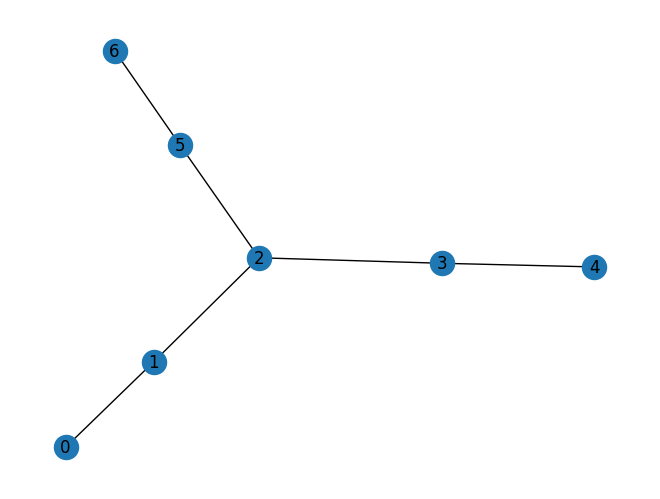

In [19]:
nx.draw(G1, with_labels = True)

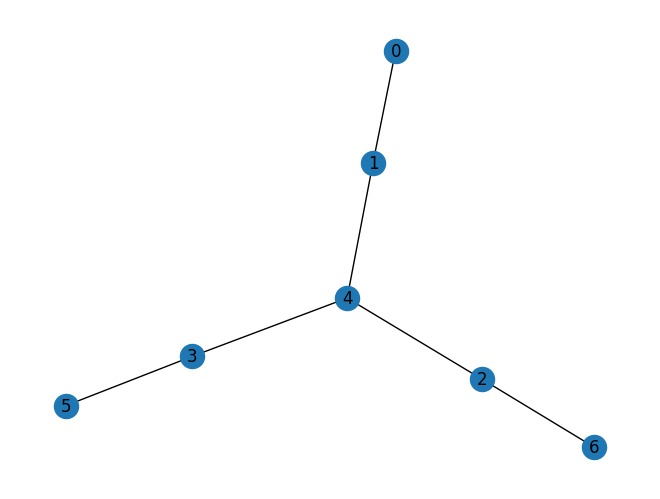

In [20]:
nx.draw(G2, with_labels = True)

## 2.2. Directed graph

In [21]:
import networkx as nx

G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1.add_nodes_from(range(0,7))
G2.add_nodes_from(range(0,7))
G1.add_edges_from([(0,1), (1,2), (2,3), (3,4), (2,5), (5,6)])
G2.add_edges_from([(0,1), (1,4), (2,4), (2,6), (4,3), (3,5)])

g1_hash = nx.weisfeiler_lehman_graph_hash(G1)
g2_hash = nx.weisfeiler_lehman_graph_hash(G2)

# g1_hash and g2_hash are equal when they are isomorphic
print(f"First  graph hash: {g1_hash}")
print(f"Second graph hash: {g2_hash}")
print(f"Checking graph isomorphic: {g1_hash==g2_hash}")

First  graph hash: 7d77c6474bd3835fe0f19ac0f27881e2
Second graph hash: 9dacf03794ba1624e5a8f373848e5ec5
Checking graph isomorphic: False


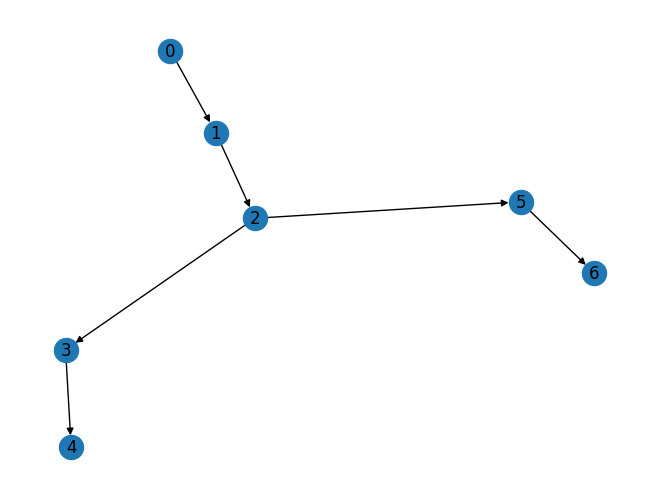

In [22]:
nx.draw(G1, with_labels = True)

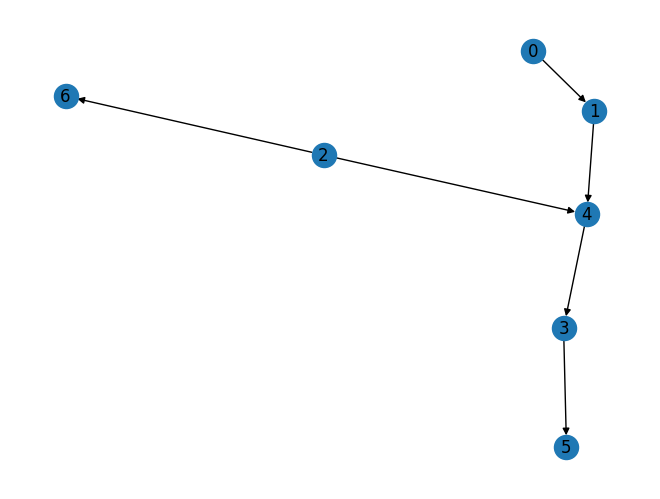

In [23]:
nx.draw(G2, with_labels = True)

# 3. Graphlet Kernels

Extract graphlet from a graph

In [24]:
# visualizing all subgraphs
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show()

In [25]:
import random
r = lambda: random.randint(0,255)
colors = []
for i in range(14):
    colors.append('#%02X%02X%02X' % (r(),r(),r()))
colors

['#921C5A',
 '#D01574',
 '#EA2874',
 '#5D66D2',
 '#535674',
 '#A356BC',
 '#AC47C7',
 '#4CB60C',
 '#232EE2',
 '#6B20EF',
 '#FB035B',
 '#FAE1C0',
 '#37B23A',
 '#1FF7AE']

[(1, 2), (1, 3)]


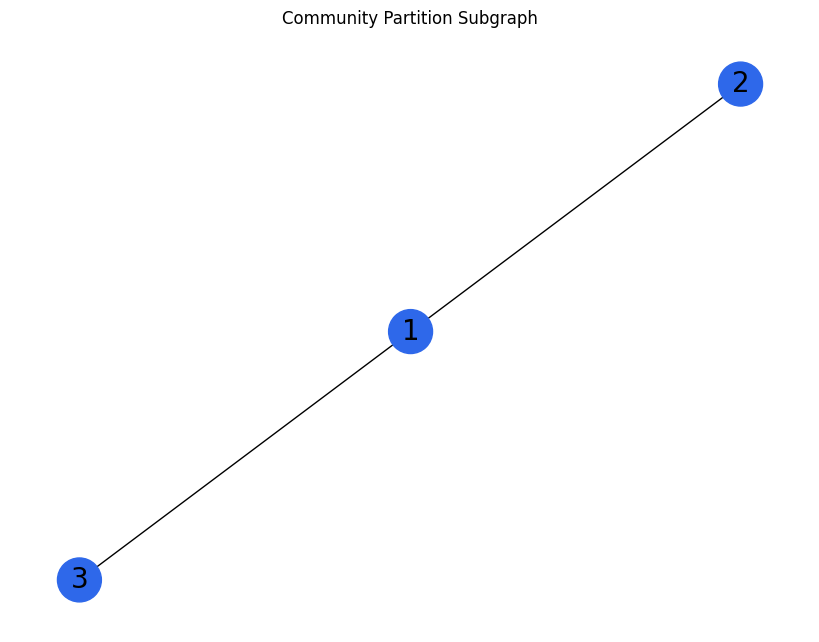

[(1, 2), (1, 7)]


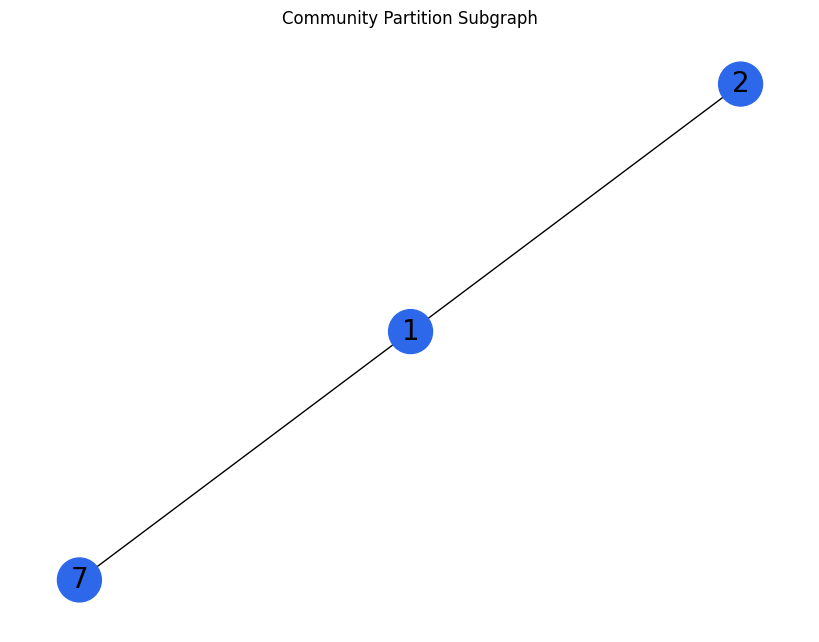

[(1, 2), (2, 4)]


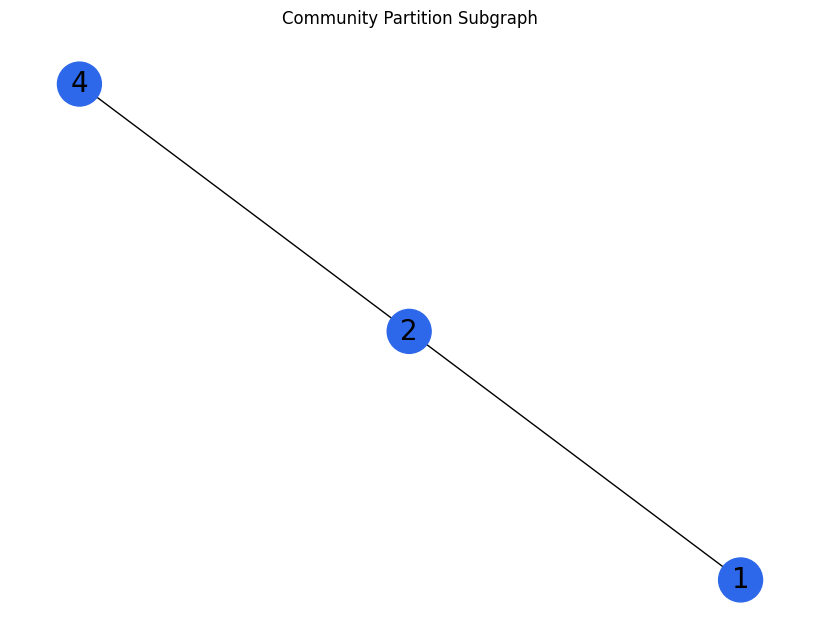

[(1, 3), (1, 7)]


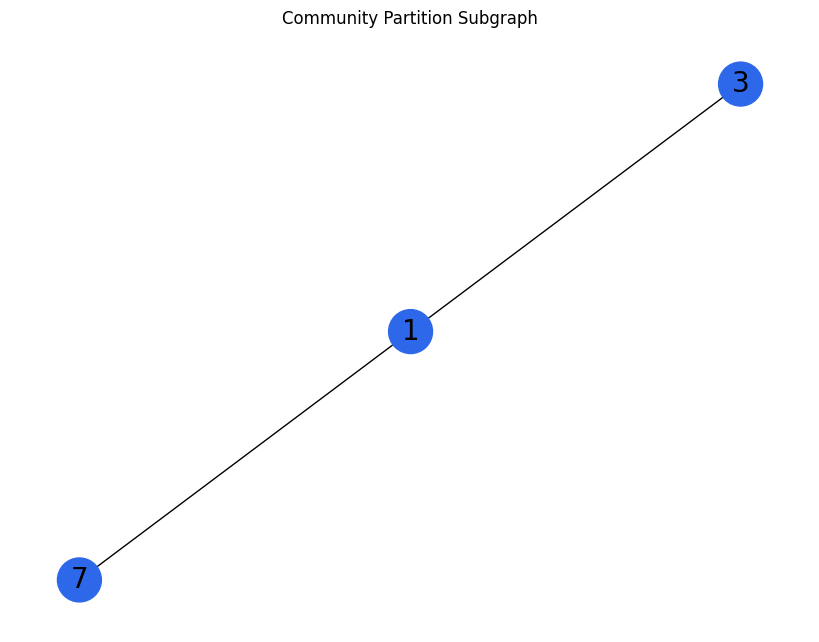

[(1, 3), (3, 4)]


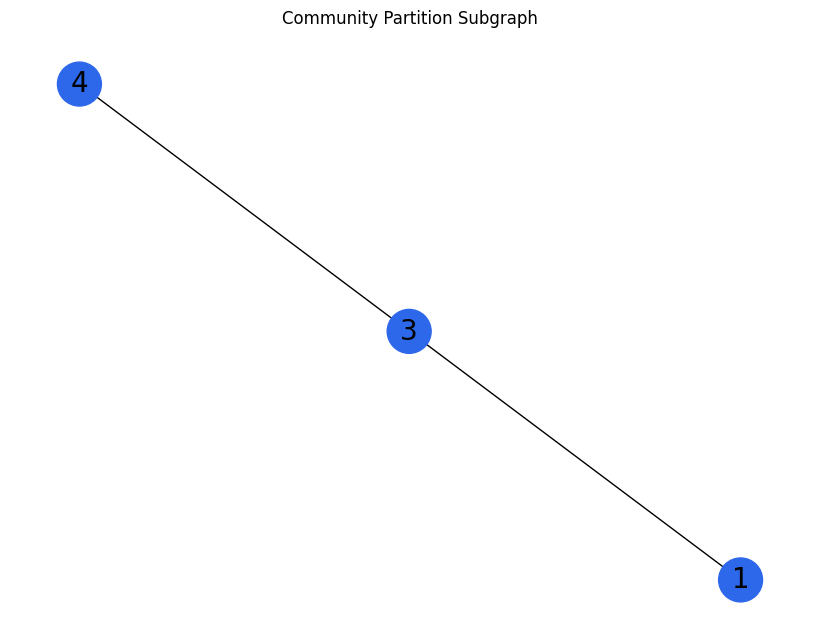

[(1, 3), (3, 5)]


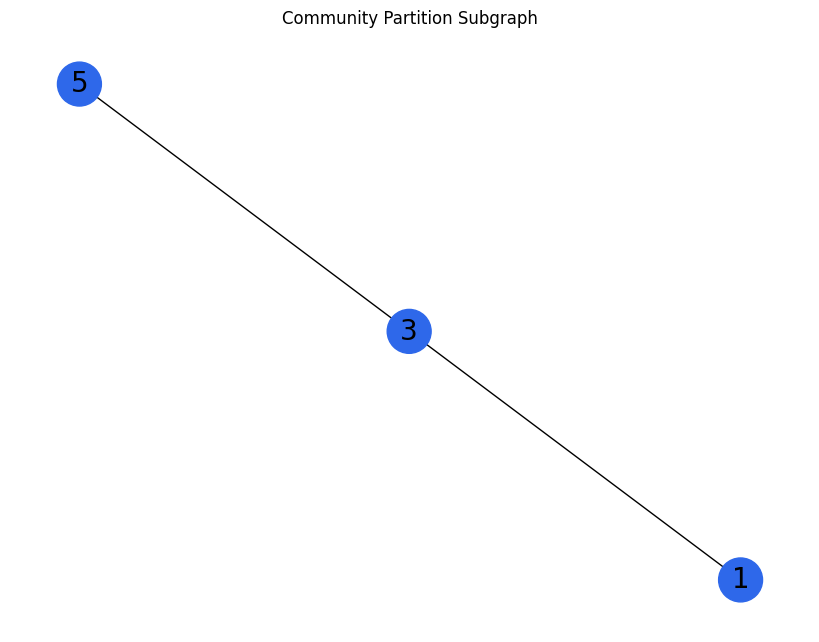

[(1, 3), (3, 6)]


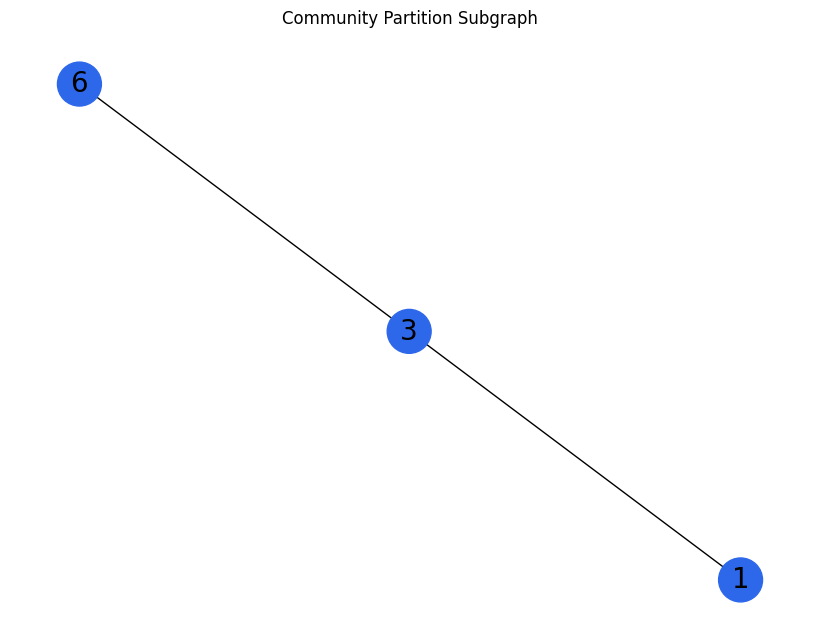

[(1, 7), (6, 7)]


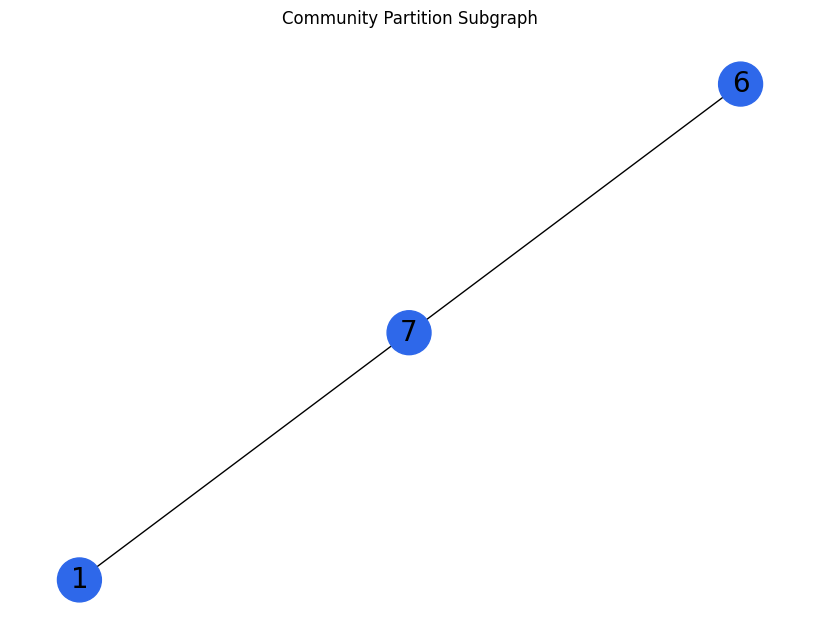

[(2, 4), (3, 4)]


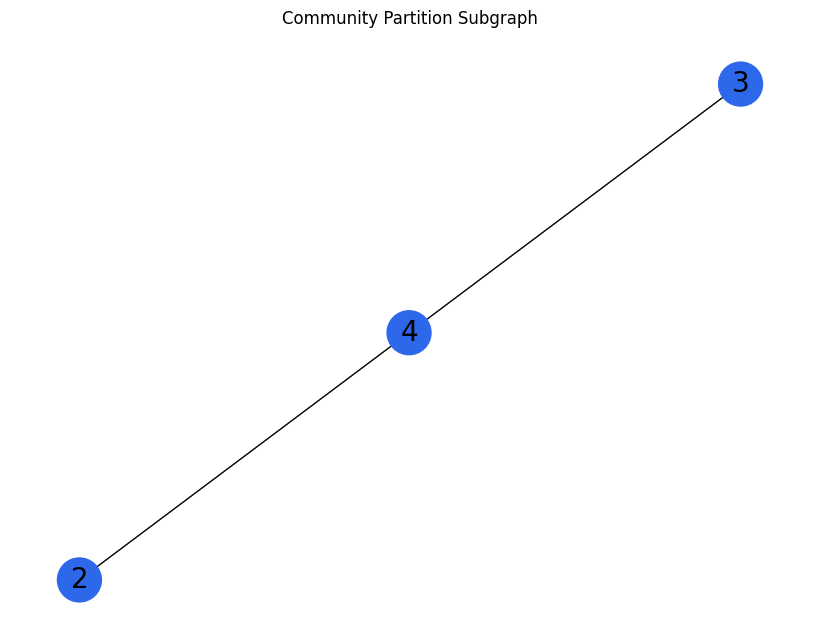

[(2, 4), (4, 5)]


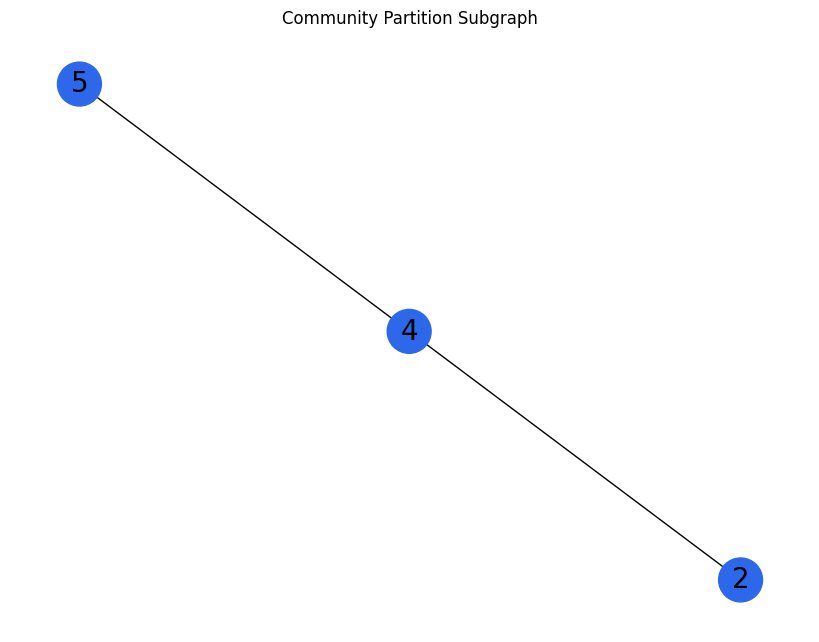

[(3, 6), (6, 7)]


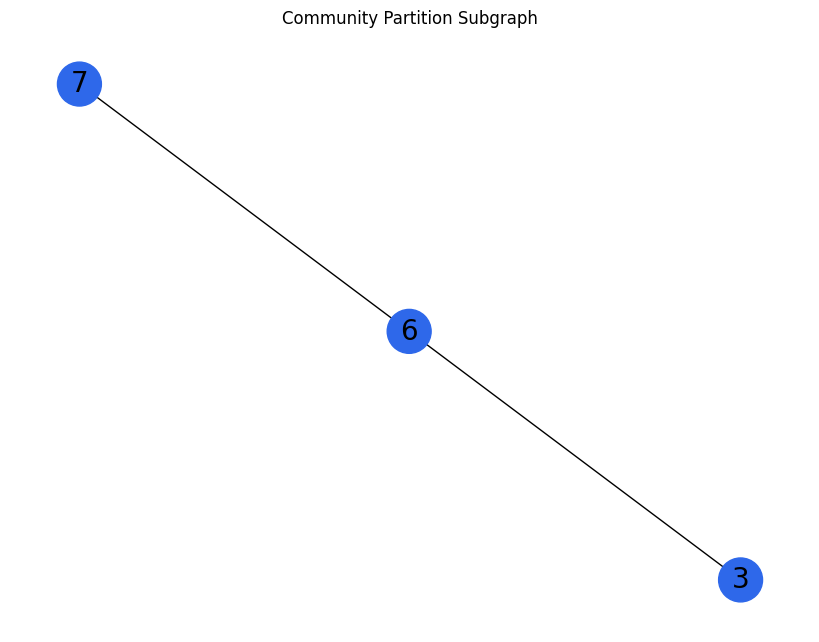

[(3, 4), (3, 6)]


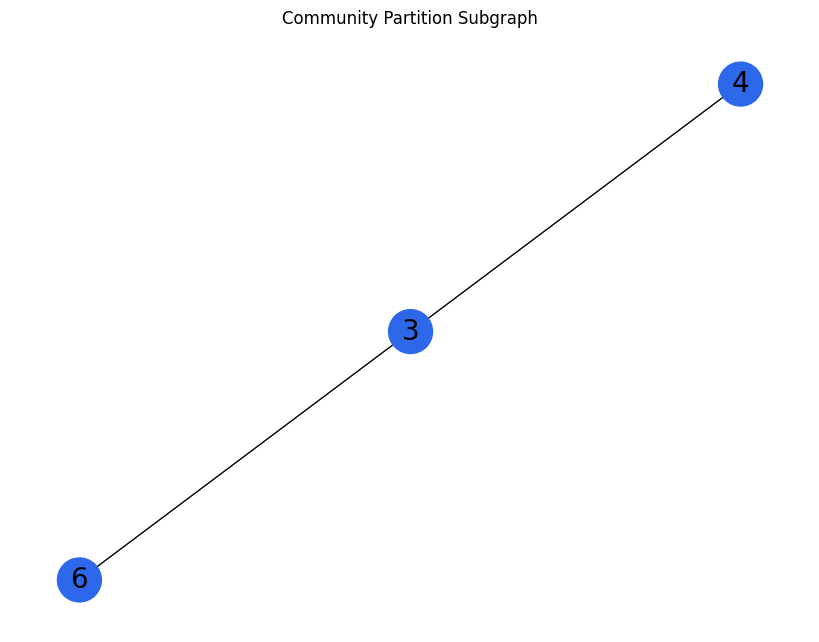

[(5, 6), (6, 7)]


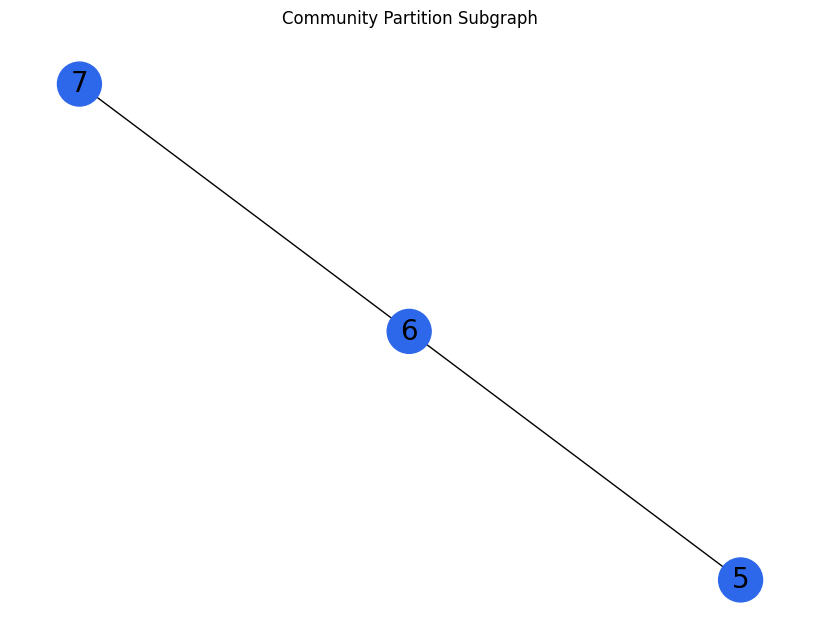

[(4, 5), (5, 6)]


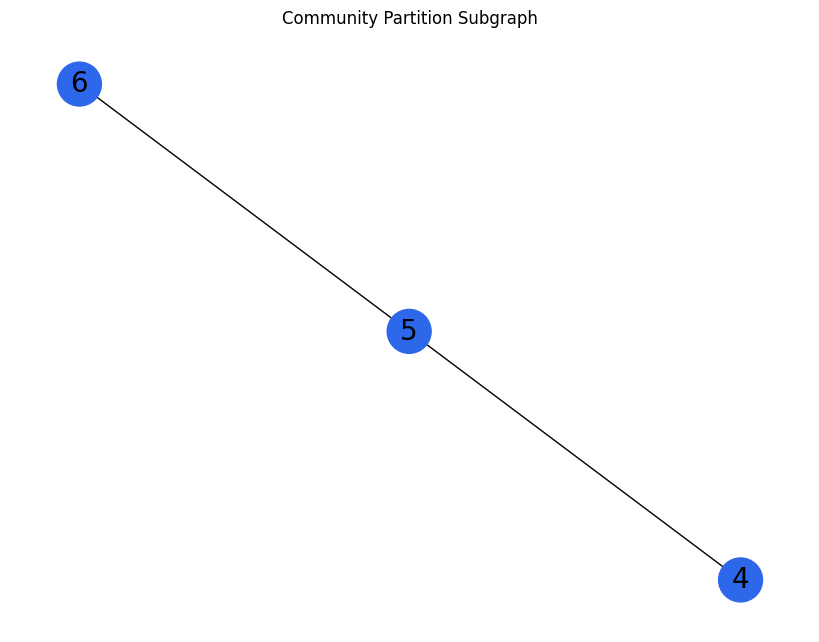

In [26]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

g = nx.Graph()
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(1,7)
g.add_edge(2,4)
g.add_edge(3,4)
g.add_edge(3,5)
g.add_edge(3,6)
g.add_edge(4,5)
g.add_edge(5,6)
g.add_edge(6,7)

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)

colors = ['#DE7A6D', '#17BDF0',  '#3B88E9', '#212B83', '#EA43F3', '#EA3D11', '#C6A8C9', '#96FE21', 
          '#C53A08', '#56B059', '#8EA7A2', '#BF9207', '#006843', '#2E68EA']
for sub_nodes in itertools.combinations(g.nodes(),len(target.nodes())):
    subg = g.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print(subg.edges())
        visualize_subgraph(subg, subg.nodes(), colors[i])

# 4. Computing the Kernel Between Two Graphs

## 4.1. Shortest Path

Consider 2 molecules H20 and H30, an ion of water produced by protonation. 

Compute the Shortest Path Kernel. 

The number are proximity same to each other, meaning that 2 molecules has same graph kernel.

[[1.]] [[0.94280904]]


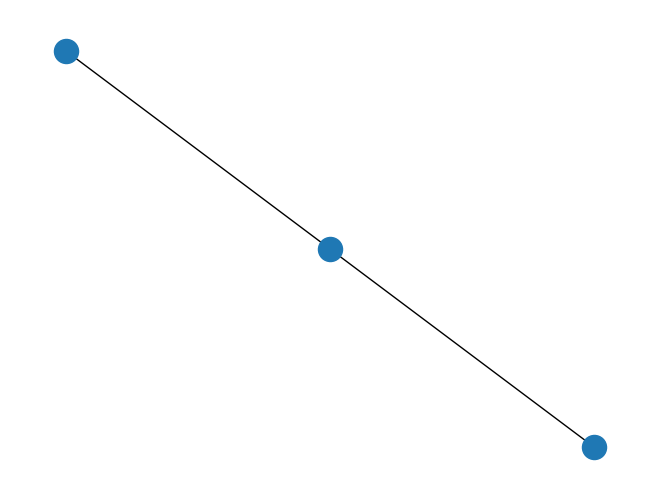

In [28]:
from grakel import Graph
from grakel.kernels import ShortestPath
import numpy as np
import networkx as nx

H2O_adjacency = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]
H2O_node_labels = {0: 'O', 1: 'H', 2: 'H'}
H2O = Graph(initialization_object=H2O_adjacency, node_labels=H2O_node_labels)

H3O_adjacency = [[0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]
H3O_node_labels = {0: 'O', 1: 'H', 2: 'H', 3:'H'}
H3O = Graph(initialization_object=H3O_adjacency, node_labels=H3O_node_labels)

sp_kernel = ShortestPath(normalize=True)
g1_sp = sp_kernel.fit_transform([H2O])
g2_sp = sp_kernel.transform([H3O])
print(g1_sp,g2_sp)

H2O_adjacency = np.matrix([[0, 1, 1], [1, 0, 0], [1, 0, 0]])
H3O_adjacency = np.matrix([[0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]])
G_h20=nx.from_numpy_array(H2O_adjacency)
nx.draw(G_h20)

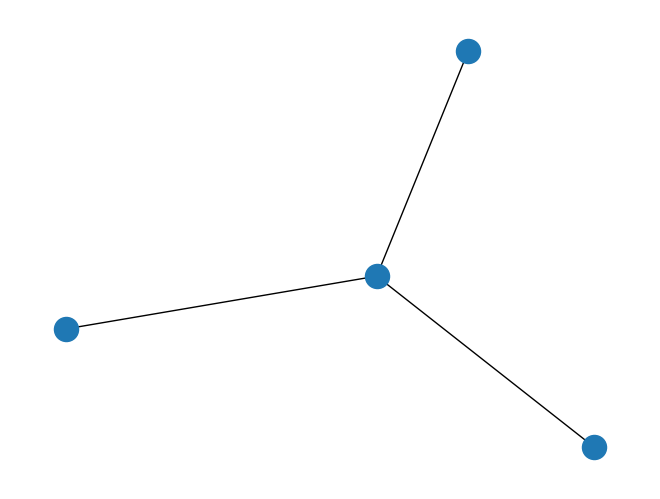

In [29]:
G_h30=nx.from_numpy_array(H3O_adjacency)
nx.draw(G_h30)

## 4.2. Random Walk

Consider 2 molecules Dimethyl_Ether and Ethanol. Compute the Random Walk Kernel.

The number are proximity same to each other, meaning that 2 molecules has same graph kernel.

In [30]:
from grakel import Graph
from grakel.kernels import RandomWalk
import numpy as np

Ethanol_adjacency = [[0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0], 
                     [0, 0, 0, 0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [1, 1, 0, 0, 0, 1, 0, 1, 0],
                     [0, 0, 1, 0, 1, 0, 1, 0, 1],
                     [0, 0, 0, 1, 0, 0, 0, 1, 0],
                    ]
Ethanol_node_labels = {0: 'H', 1: 'H', 2: 'H', 3:'H', 4:'H', 5:'H', 6:'C', 7:'C', 8 :'O'}

Ethanol = Graph(initialization_object=Ethanol_adjacency, node_labels=Ethanol_node_labels)

Dimethyl_Ether_adjacency = [[0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0], 
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [1, 1, 0, 0, 0, 1, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 1],
                     [0, 0, 1, 1, 1, 0, 0, 1, 0],
                    ]
Dimethyl_Ether_node_labels = {0: 'H', 1: 'H', 2: 'H', 3:'H', 4:'H', 5:'H', 6:'C', 7:'O', 8 :'C'}
Dimethyl_Ether = Graph(initialization_object=Dimethyl_Ether_adjacency, node_labels=Dimethyl_Ether_node_labels)

rw_kernel = RandomWalk(normalize=True)
g1_rw = rw_kernel.fit_transform([Ethanol])
g2_rw = rw_kernel.transform([Dimethyl_Ether])
print(g1_rw,g2_rw)

[[1.]] [[0.99860269]]


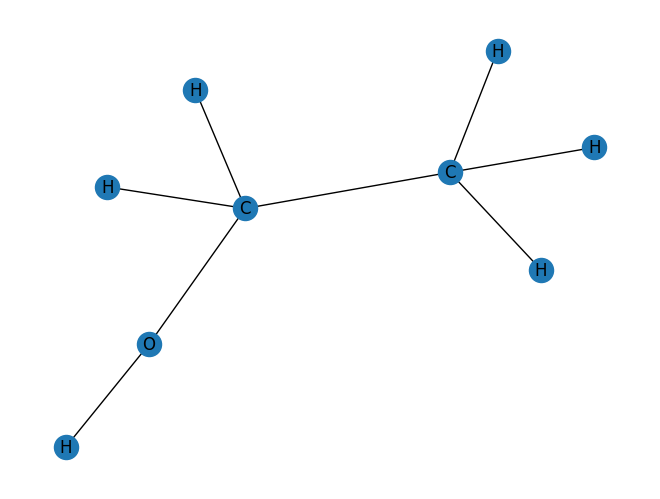

In [31]:
Ethanol_adjacency =  np.matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0], 
                     [0, 0, 0, 0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [1, 1, 0, 0, 0, 1, 0, 1, 0],
                     [0, 0, 1, 0, 1, 0, 1, 0, 1],
                     [0, 0, 0, 1, 0, 0, 0, 1, 0],
                    ])

G=nx.from_numpy_array(Ethanol_adjacency)
nx.draw(G, pos=nx.spring_layout(G), labels=Ethanol_node_labels, with_labels = True)

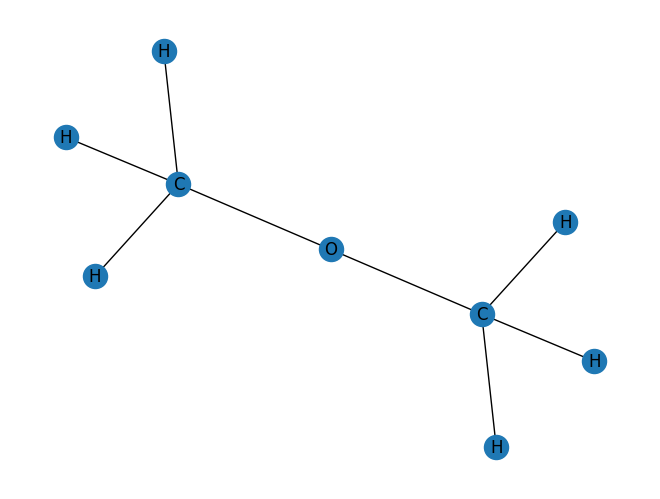

In [32]:
Dimethyl_Ether_adjacency = np.matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0], 
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [1, 1, 0, 0, 0, 1, 0, 1, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 1],
                     [0, 0, 1, 1, 1, 0, 0, 1, 0],
                    ])
G_dimethyl=nx.from_numpy_array(Dimethyl_Ether_adjacency)
nx.draw(G_dimethyl, pos=nx.spring_layout(G_dimethyl), labels=Dimethyl_Ether_node_labels, with_labels = True)